In [37]:
import pandas as pd
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

opening and cleaning the data from "sold.csv"

In [38]:
df=pd.read_csv("sold.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       2109 non-null   object
 1   type       2109 non-null   object
 2   room       2106 non-null   object
 3   sqm        2109 non-null   object
 4   price      2109 non-null   int64 
 5   price/sqm  2109 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 99.0+ KB


In [39]:
df.head()

,area,type,room,sqm,price,price/sqm
0,Kallio,kt,"1h, kk","28,50",225000,7895
1,Malmi,kt,"1h, kk, ikkunal...","33,00",106000,3212
2,Harju,kt,1h+kph,"24,00",195000,8125
3,Kamppi,kt,"1h, kk, alkovi,...","32,00",294000,9188
4,Lauttasaari,kt,"1h, avok. kph, ...","33,00",215000,6515


In [40]:
df=df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       2109 non-null   string
 1   type       2109 non-null   string
 2   room       2106 non-null   string
 3   sqm        2109 non-null   string
 4   price      2109 non-null   Int64 
 5   price/sqm  2109 non-null   Int64 
dtypes: Int64(2), string(4)
memory usage: 103.1 KB


In [41]:
df.sqm=df.sqm.str.replace(",",".").astype(float)


Redundand, because the data was restricted to "kerrostalo" during scraping already

In [42]:
df.type="Kerrostalo"

In [43]:
df.head()

,area,type,room,sqm,price,price/sqm
0,Kallio,Kerrostalo,"1h, kk",28.5,225000,7895
1,Malmi,Kerrostalo,"1h, kk, ikkunal...",33.0,106000,3212
2,Harju,Kerrostalo,1h+kph,24.0,195000,8125
3,Kamppi,Kerrostalo,"1h, kk, alkovi,...",32.0,294000,9188
4,Lauttasaari,Kerrostalo,"1h, avok. kph, ...",33.0,215000,6515


we try to get the number of rooms from the description. in most cases it is a number, followed by (whitespace)(h)(H)

In [44]:
df["rooms"]=df.room.str.extract(r"(\d+)\s*.*[h|H]")

In [45]:
df.rooms.unique()

array(['1', <NA>, '2', '3'], dtype=object)

let's look at the rows which were not caught with this:

In [46]:
mask=df.rooms.isnull()
df[mask]

,area,type,room,sqm,price,price/sqm,rooms
102,Kamppi,Kerrostalo,1+kk,23.0,256000,11130,<NA>
123,Kontula,Kerrostalo,1k+kt+las.par.,31.5,173500,5508,<NA>
129,Töölö,Kerrostalo,Ylimmän ke...,20.0,183000,9150,<NA>
147,Punavuori,Kerrostalo,Ih+tk,29.0,325000,11207,<NA>
272,Taka-töölö,Kerrostalo,"huone, avok, kph",30.0,221000,7367,<NA>
276,Kuninkaantammi,Kerrostalo,<NA>,12.0,15000,1250,<NA>
329,Kalasatama,Kerrostalo,<NA>,28.0,265000,9464,<NA>
458,Kuninkaantammi,Kerrostalo,<NA>,12.0,13000,1083,<NA>
512,Koskela,Kerrostalo,autopaikka,12.5,25000,2000,<NA>
519,Harju,Kerrostalo,Yksiö + kk...,37.0,265000,7162,<NA>


i drop them for now, because they are few and diverse

In [47]:

df=df.dropna(subset="rooms",axis=0)
df.rooms=df.rooms.astype(int)

In [48]:
df.describe()

,sqm,price,price/sqm,rooms
count,2085.000000,2.085000e+03,2085.000000,2085.000000
mean,44.866763,2.726754e+05,6315.757314,1.694484
std,13.492427,1.171468e+05,2217.967056,0.513908
min,13.500000,8.600000e+04,1811.000000,1.000000
25%,34.500000,1.900000e+05,4643.000000,1.000000
50%,46.000000,2.480000e+05,6364.000000,2.000000
75%,54.000000,3.260000e+05,7846.000000,2.000000
max,110.500000,1.100000e+06,14412.000000,3.000000


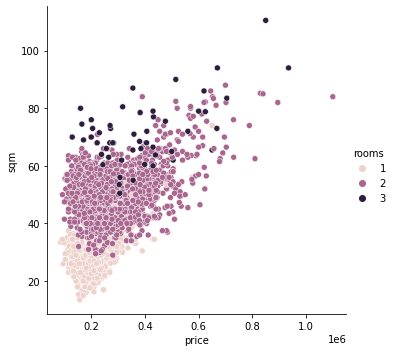

In [56]:

sns.relplot(data=df,x="price", y="sqm", hue="rooms")

studio apartments have a tendency to higher sqm prices:

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='rooms', ylabel='price/sqm'>

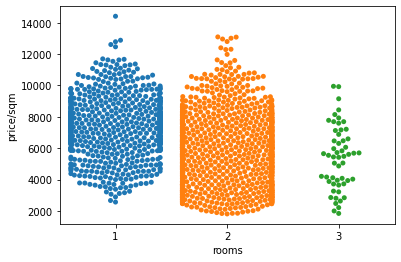

In [57]:
sns.swarmplot(data=df,y="price/sqm",x="rooms")

most expensive by sqm price:

In [51]:
mostex=df["price/sqm"].idxmax()

In [52]:
df.loc[mostex]

area                 Ullanlinna
type                 Kerrostalo
room         1h, keittonurkk...
sqm                        17.0
price                    245000
price/sqm                 14412
rooms                         1
Name: 17, dtype: object

cheapest, by sqm price:

In [53]:
cheapest=df["price/sqm"].idxmin()

In [54]:
df.loc[cheapest]

area                  Siltamäki
type                 Kerrostalo
room         2h, k, kph,wc,v...
sqm                        63.5
price                    115000
price/sqm                  1811
rooms                         2
Name: 1054, dtype: object

save the cleaned data to:

In [55]:
df.to_csv("clean_sold.csv", index=False)